In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("Walmartsales_Dataset.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Customer ID
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,05-01-2019,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,08-03-2019,10:29:00,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,11
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,27-01-2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,11
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,08-02-2019,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,9


In [4]:
df.shape

(1000, 18)

In [5]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Customer ID'],
      dtype='object')

In [6]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
Customer ID                  int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Customer ID                0
dtype: int64

In [9]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Customer ID
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,7.975000
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,4.317756
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,1.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,4.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,8.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,12.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,15.000000


In [10]:
# Check duplicat
df.duplicated().sum()

np.int64(0)

In [11]:
# Unique values in categorical columns
df['Branch'].unique()
df['City'].unique()
df['Customer type'].unique()
df['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [12]:
# Branch-wise sales summary
df.groupby('Branch')['Total'].sum()

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

In [13]:
# Product line wise statistics
df.groupby('Product line')['Total'].agg(['sum', 'mean', 'count'])

,sum,mean,count
Product line,,,
Electronic accessories,54337.5315,319.632538,170
Fashion accessories,54305.8950,305.089298,178
Food and beverages,56144.8440,322.671517,174
Health and beauty,49193.7390,323.643020,152
Home and lifestyle,53861.9130,336.636956,160
Sports and travel,55122.8265,332.065220,166


In [14]:
# Total sales by payment method
df.groupby('Payment')['Total'].sum()

Payment
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: Total, dtype: float64

In [15]:
# Sales by gender
df.groupby('Gender')['Total'].sum()

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64

In [16]:
# Average rating by product line
df.groupby('Product line')['Rating'].mean()

Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64

In [17]:
# Most profitable product line
df.groupby('Product line')['gross income'].sum().sort_values(ascending=False)

Product line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Health and beauty         2342.5590
Name: gross income, dtype: float64

In [18]:
# Count unique invoices
df['Invoice ID'].nunique()


1000

In [19]:
# Total sales by branch
df.groupby('Branch')['Total'].sum()

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

In [20]:
# Average rating by branch
df.groupby('Branch')['Rating'].mean()

Branch
A    7.027059
B    6.818072
C    7.072866
Name: Rating, dtype: float64

In [21]:
# Average gross income by city
df.groupby('City')['gross income'].mean()


City
Mandalay     15.232024
Naypyitaw    16.052367
Yangon       14.874001
Name: gross income, dtype: float64

In [22]:
# Sales by city
df.groupby('City')['Total'].sum()

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64

In [23]:
# Sales by customer type
df.groupby('Customer type')['Total'].sum()


Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

In [24]:
# Average rating by customer type
df.groupby('Customer type')['Rating'].mean()

Customer type
Member    6.940319
Normal    7.005210
Name: Rating, dtype: float64

In [25]:
# Sales by gender
df.groupby('Gender')['Total'].sum()

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64

In [26]:
# Average purchase amount by gender
df.groupby('Gender')['Total'].mean()


Gender
Female    335.095659
Male      310.789226
Name: Total, dtype: float64

In [27]:
# Total sales by product line
df.groupby('Product line')['Total'].sum().sort_values(ascending=False)

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

In [28]:
# Average rating by product line
df.groupby('Product line')['Rating'].mean()

Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64

In [29]:
# Average unit price
df['Unit price'].mean()


np.float64(55.67213)

In [30]:
# Highest priced product line
df.groupby('Product line')['Unit price'].mean().sort_values(ascending=False)

Product line
Fashion accessories       57.153652
Sports and travel         56.993253
Food and beverages        56.008851
Home and lifestyle        55.316937
Health and beauty         54.854474
Electronic accessories    53.551588
Name: Unit price, dtype: float64

In [31]:
# Average quantity sold per product line
df.groupby('Product line')['Quantity'].mean()

Product line
Electronic accessories    5.711765
Fashion accessories       5.067416
Food and beverages        5.471264
Health and beauty         5.618421
Home and lifestyle        5.693750
Sports and travel         5.542169
Name: Quantity, dtype: float64

In [32]:
# Max quantity purchased in one invoice
df['Quantity'].max()

np.int64(10)

In [33]:
# Total tax collected
df['Tax 5%'].sum()


np.float64(15379.368999999999)

In [34]:
# Average tax by product line
df.groupby('Product line')['Tax 5%'].mean()

Product line
Electronic accessories    15.220597
Fashion accessories       14.528062
Food and beverages        15.365310
Health and beauty         15.411572
Home and lifestyle        16.030331
Sports and travel         15.812630
Name: Tax 5%, dtype: float64

In [35]:
# Total revenue
df['Total'].sum()

np.float64(322966.749)

In [36]:
# Payment method distribution
df['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

In [37]:
# Total sales by payment method
df.groupby('Payment')['Total'].sum()

Payment
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: Total, dtype: float64

In [38]:
# Total cost of goods sold
df['cogs'].sum()

np.float64(307587.38)

In [39]:
# Average COGS per branch
df.groupby('Branch')['cogs'].mean()

Branch
A    297.480029
B    304.640482
C    321.047348
Name: cogs, dtype: float64

In [40]:
# Total gross income
df['gross income'].sum()

np.float64(15379.368999999999)

In [41]:
# Average rating
df['Rating'].mean()

np.float64(6.9727)

In [42]:
# Highest-rated product line
df.groupby('Product line')['Rating'].mean().sort_values(ascending=False)

Product line
Food and beverages        7.113218
Fashion accessories       7.029213
Health and beauty         7.003289
Electronic accessories    6.924706
Sports and travel         6.916265
Home and lifestyle        6.837500
Name: Rating, dtype: float64

In [43]:
# Number of unique customers
df['Customer ID'].nunique()

15

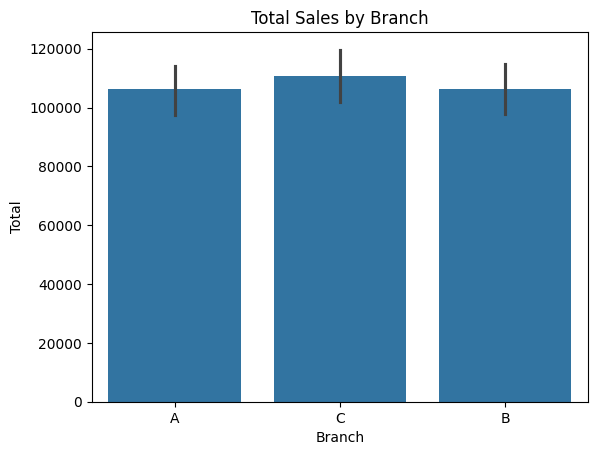

In [44]:
# 1. Sales by Branch

sns.barplot(x='Branch', y='Total', data=df, estimator=sum)
plt.title("Total Sales by Branch")
plt.show()


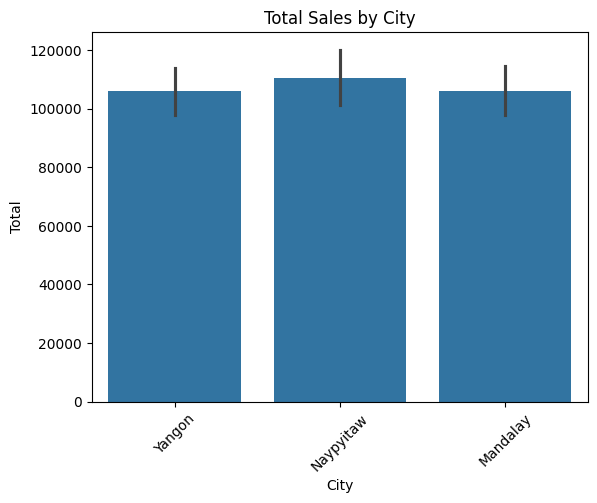

In [45]:
# 2. Sales by City
sns.barplot(x='City', y='Total', data=df, estimator=sum)
plt.title("Total Sales by City")
plt.xticks(rotation=45)
plt.show()


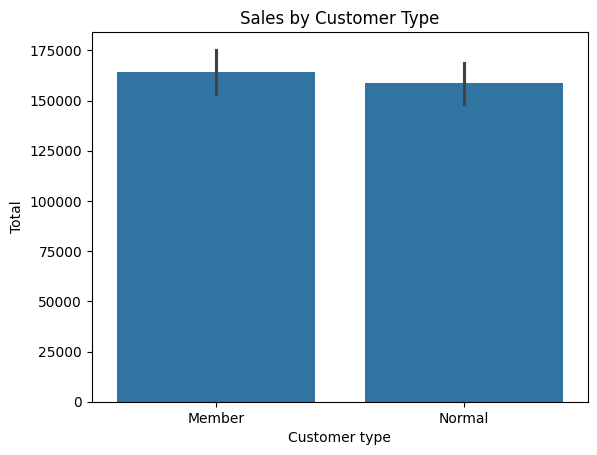

In [46]:
# 3. Customer Type vs Sales
sns.barplot(x='Customer type', y='Total', data=df, estimator=sum)
plt.title("Sales by Customer Type")
plt.show()


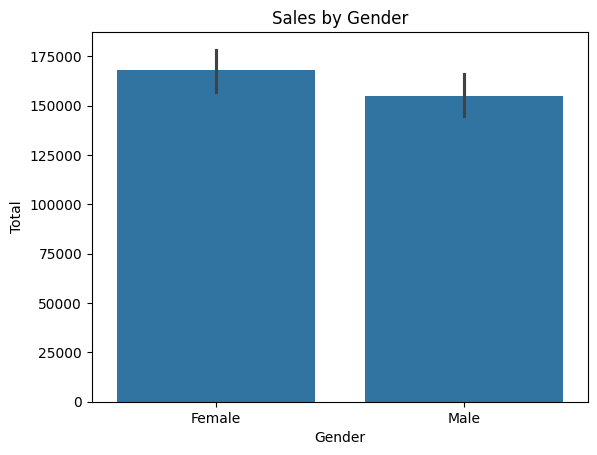

In [47]:
# 4. Gender vs Sales
sns.barplot(x='Gender', y='Total', data=df, estimator=sum)
plt.title("Sales by Gender")
plt.show()


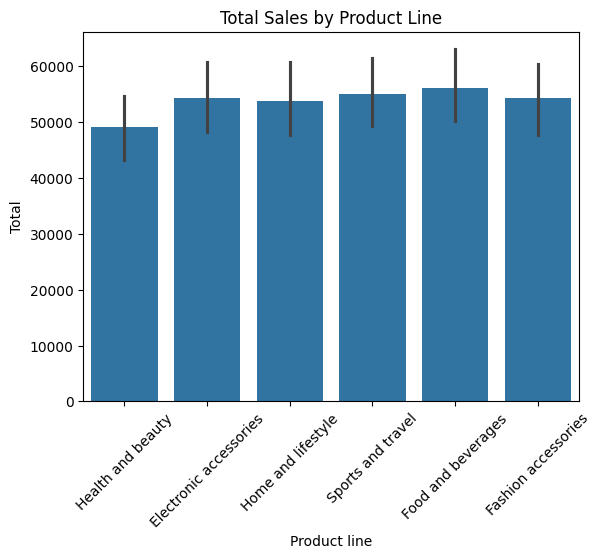

In [48]:
# 5. Sales by Product Line
sns.barplot(x='Product line', y='Total', data=df, estimator=sum)
plt.title("Total Sales by Product Line")
plt.xticks(rotation=45)
plt.show()



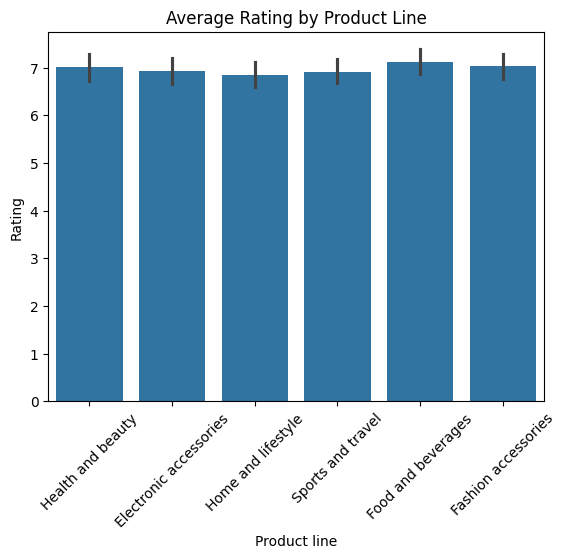

In [49]:
# 6. Average Rating by Product Line
sns.barplot(x='Product line', y='Rating', data=df)
plt.title("Average Rating by Product Line")
plt.xticks(rotation=45)
plt.show()


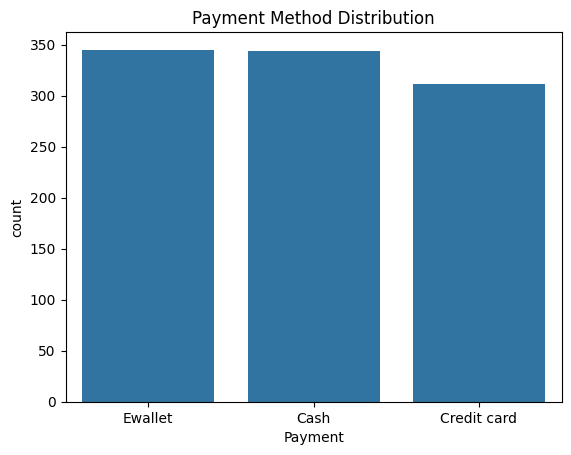

In [50]:
#7. Payment Method Distribution
sns.countplot(x='Payment', data=df)
plt.title("Payment Method Distribution")
plt.show()


C:\Users\anany\AppData\Local\Temp\ipykernel_1780\3146698164.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


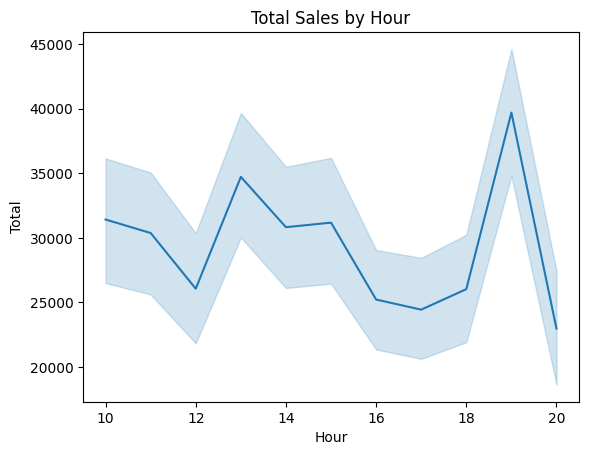

In [51]:
# 8. Sales by Hour of the Day
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
sns.lineplot(x='Hour', y='Total', data=df, estimator=sum)
plt.title("Total Sales by Hour")
plt.show()


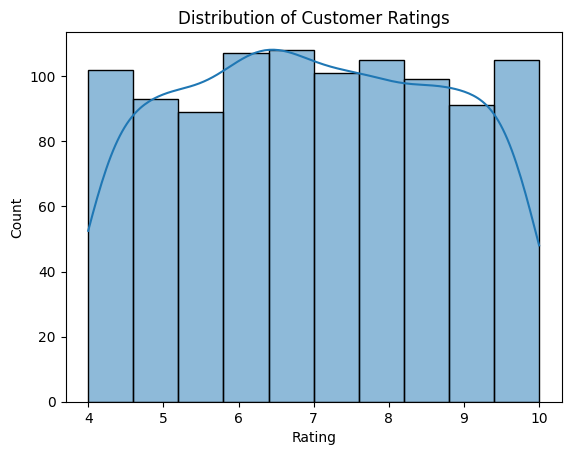

In [52]:
# 10.Distribution of Ratings
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title("Distribution of Customer Ratings")
plt.show()


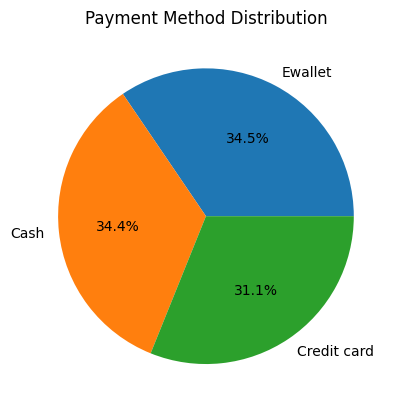

In [53]:
df['Payment'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Payment Method Distribution")
plt.ylabel("")
plt.show()


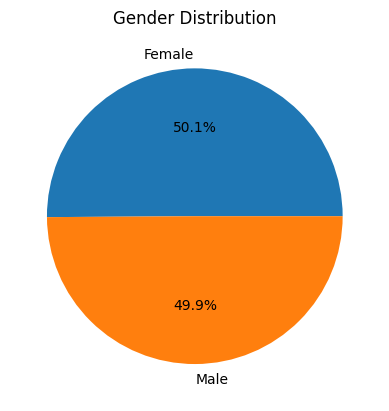

In [54]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Gender Distribution")
plt.ylabel("")
plt.show()


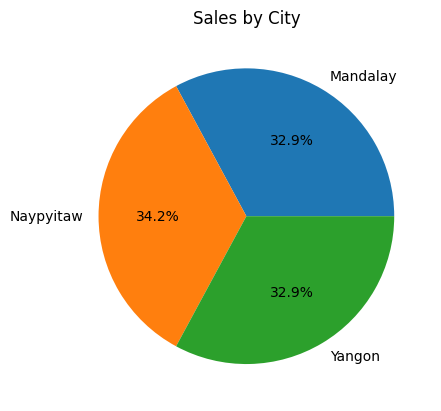

In [55]:
df.groupby('City')['Total'].sum().plot(kind='pie', autopct='%1.1f%%', title="Sales by City")
plt.ylabel("")
plt.show()


In [56]:
# Save as Excel file
! pip install openpyxl
df.to_excel("Walmartsales.xlsx", index=False)


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
